# IEEE grids for testing the synthetic grid topology generation

In [20]:
import pandapower as pp
import pandapower.networks as pn
import pandas as pd
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt

from powergrid_synth.generator import PowerGridGenerator
from powergrid_synth.bus_type_allocator import BusTypeAllocator
from powergrid_synth.comparison import GraphComparator
from powergrid_synth.visualization import GridVisualizer
from powergrid_synth.data_format_converter import pandapower_to_nx
from powergrid_synth.input_extractor import extract_topology_params_from_graph
    
from pandapower.topology.create_graph import create_nxgraph

### Load an IEEE grid using pandapower

In [21]:
# 1. Load Real IEEE Grid and Convert
print("\n[1] Loading Reference Grid (IEEE)...")
net_real = pn.case118()
graph_real = pandapower_to_nx(net_real)
# graph_real = create_nxgraph(net_real, respect_switches = False)

print(f"Loaded {graph_real.number_of_nodes()} nodes and {graph_real.number_of_edges()} edges.")



[1] Loading Reference Grid (IEEE)...
Loaded 118 nodes and 179 edges.


In [22]:
net_real

This pandapower network includes the following parameter tables:
   - bus (118 elements)
   - load (99 elements)
   - gen (53 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (173 elements)
   - trafo (13 elements)
   - poly_cost (54 elements)

In [23]:
net_real.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,min_vm_pu,geo
0,1,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-2.2753708781, 2.8543413351],..."
1,2,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-2.9368186836, 2.2121792656],..."
2,3,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-1.8344312496, 1.7094451782],..."
3,4,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-0.8886268958, 1.5532705585],..."
4,5,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-0.9632829393, 0.694729907], ..."
...,...,...,...,...,...,...,...,...
113,114,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [2.2630604919, -2.7868829987],..."
114,115,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [3.1644478736, -2.3853607175],..."
115,116,345.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-4.1528539003, -4.9348933434]..."
116,117,138.0,b,1.0,True,1.06,0.94,"{""coordinates"": [-3.5172125372, 1.7774067282],..."


In [24]:
net_real.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service,id_characteristic_table,step_dependency_table
0,4,None,40.0,0.0,138.0,1,1,True,<NA>,False
1,33,None,-14.0,0.0,138.0,1,1,True,<NA>,False
2,36,None,25.0,0.0,138.0,1,1,True,<NA>,False
3,43,None,-10.0,0.0,138.0,1,1,True,<NA>,False
4,44,None,-10.0,0.0,138.0,1,1,True,<NA>,False
5,45,None,-10.0,0.0,138.0,1,1,True,<NA>,False
6,47,None,-15.0,0.0,138.0,1,1,True,<NA>,False
7,73,None,-12.0,0.0,138.0,1,1,True,<NA>,False
8,78,None,-20.0,0.0,138.0,1,1,True,<NA>,False
9,81,None,-20.0,0.0,138.0,1,1,True,<NA>,False


In [25]:
net_real.load

,name,bus,p_mw,q_mvar,const_z_p_percent,const_z_q_percent,const_i_p_percent,const_i_q_percent,sn_mva,scaling,in_service,type,controllable
0,None,0,51.0,27.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
1,None,1,20.0,9.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
2,None,2,39.0,10.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
3,None,3,39.0,12.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
4,None,5,52.0,22.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,None,113,8.0,3.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
95,None,114,22.0,7.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
96,None,115,184.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False
97,None,116,20.0,8.0,0.0,0.0,0.0,0.0,NaN,1.0,True,None,False


In [26]:
net_real.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw,id_q_capability_characteristic,reactive_capability_curve,curve_style
0,None,0,0.0,0.955,NaN,-5.0,15.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
1,None,3,0.0,0.998,NaN,-300.0,300.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
2,None,5,0.0,0.990,NaN,-13.0,50.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
3,None,7,0.0,1.015,NaN,-300.0,300.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
4,None,9,450.0,1.050,NaN,-147.0,200.0,1.0,False,True,0.0,None,True,550.0,0.0,<NA>,False,None
5,None,11,85.0,0.990,NaN,-35.0,120.0,1.0,False,True,0.0,None,True,185.0,0.0,<NA>,False,None
6,None,14,0.0,0.970,NaN,-10.0,30.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
7,None,17,0.0,0.973,NaN,-16.0,50.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
8,None,18,0.0,0.962,NaN,-8.0,24.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None
9,None,23,0.0,0.992,NaN,-300.0,300.0,1.0,False,True,0.0,None,True,100.0,0.0,<NA>,False,None


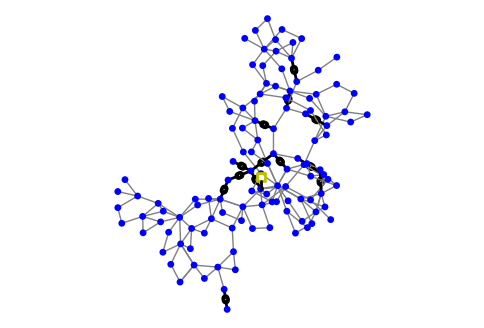

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax = pp.plotting.simple_plot(net_real, ax=ax)

## Generate a synthetic grid

### Extract Topology Characteristics from Graph

In [28]:
print("\n[2] Analyzing Reference Topology...")
params = extract_topology_params_from_graph(graph_real)


[2] Analyzing Reference Topology...
Extracting topology parameters...


### PowerGridGenerator

In [29]:
# 3. Generate Synthetic Grid
print("\n[3] Generating Synthetic Clone...")
gen = PowerGridGenerator(seed=53)
synthetic_graph = gen.generate_grid(
    degrees_by_level=params['degrees_by_level'],
    diameters_by_level=params['diameters_by_level'],
    transformer_degrees=params['transformer_degrees'],
    keep_lcc=True
)


[3] Generating Synthetic Clone...
--- Starting Generation for 3 Voltage Levels ---
Generating Level 0...
  -> Level 0 Complete. Nodes: 14, Edges: 9
Generating Level 1...
  -> Level 1 Complete. Nodes: 2, Edges: 0
Generating Level 2...
  -> Level 2 Complete. Nodes: 117, Edges: 143
Generating Transformer Connections...
  -> Connecting Level 0 <-> Level 1
  -> Connecting Level 0 <-> Level 2
  -> Connecting Level 1 <-> Level 2
Filtering for Largest Connected Component (LCC)...
  -> Kept 118 nodes (removed 15 isolated nodes).


### Bus type assignment (optional)

In [30]:
# 4. Allocate Bus Types
print("\n[4] Allocating Bus Types via AIS...")
allocator = BusTypeAllocator(synthetic_graph)
# The allocator uses the graph size to determine target ratios dynamically
bus_types = allocator.allocate(max_iter=50)
nx.set_node_attributes(synthetic_graph, bus_types, name="bus_type")


[4] Allocating Bus Types via AIS...
Starting Bus Type Allocation (N=118, M=164)...
  Target Entropy Score (W*): 2.6017, Std Dev: 0.0409
  Iter 0: Best Error = 0.001633
  Converged at iteration 7. Error: 0.000014 < Criteria: 0.000041


## Analysis

In [31]:
#5. Compare using the Library Module
print("\n[5] Running Comparative Analysis...")
comparator = GraphComparator(
    synth_graph=synthetic_graph, 
    ref_graph=graph_real, 
    synth_label="Synthetic", 
    ref_label="IEEE grid"
)


[5] Running Comparative Analysis...


#### Compare some metric Globally

In [32]:
comparator.print_metric_comparison(title="GLOBAL TOPOLOGY COMPARISON")


GLOBAL TOPOLOGY COMPARISON
            Metric Synthetic IEEE grid
             Nodes       118       118
             Edges       164       179
           Density  0.023758  0.025931
        Connected?       Yes       Yes
    Diameter (LCC)        14        14
Avg Path Len (LCC)    6.3178    6.3087
    Avg Clustering    0.1350    0.1651
      Transitivity    0.1146    0.1356



#### Plot the global node degree distribution for two grids

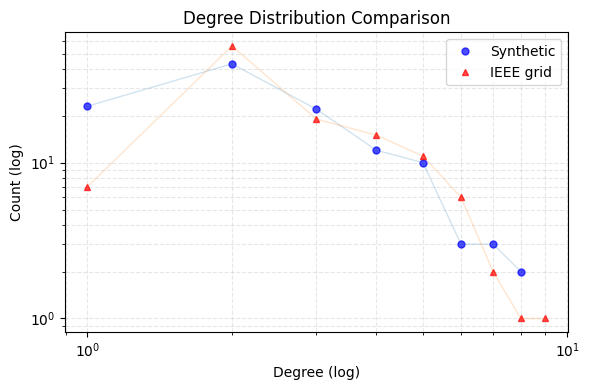

In [33]:
comparator.plot_degree_comparison(log_scale=True, fig_size=(6,4), show_lines=True,)

#### Compare the histograms of node degrees for each voltage level

Plotting Combined Comparison Figure for 3 Levels (Log Scale: False)...


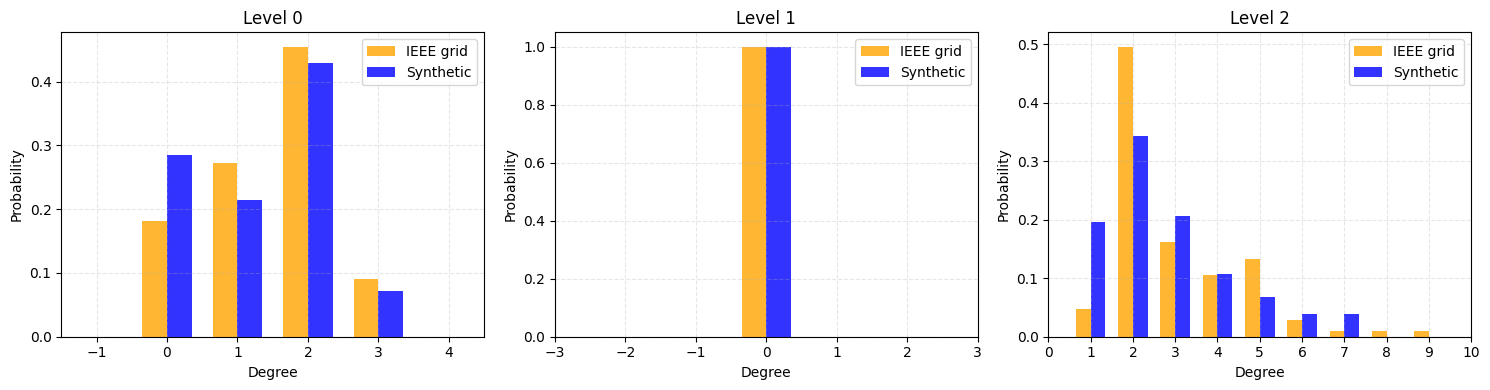

In [34]:
comparator.plot_all_levels_comparison(False)

#### Compare other topology metrics per voltage level

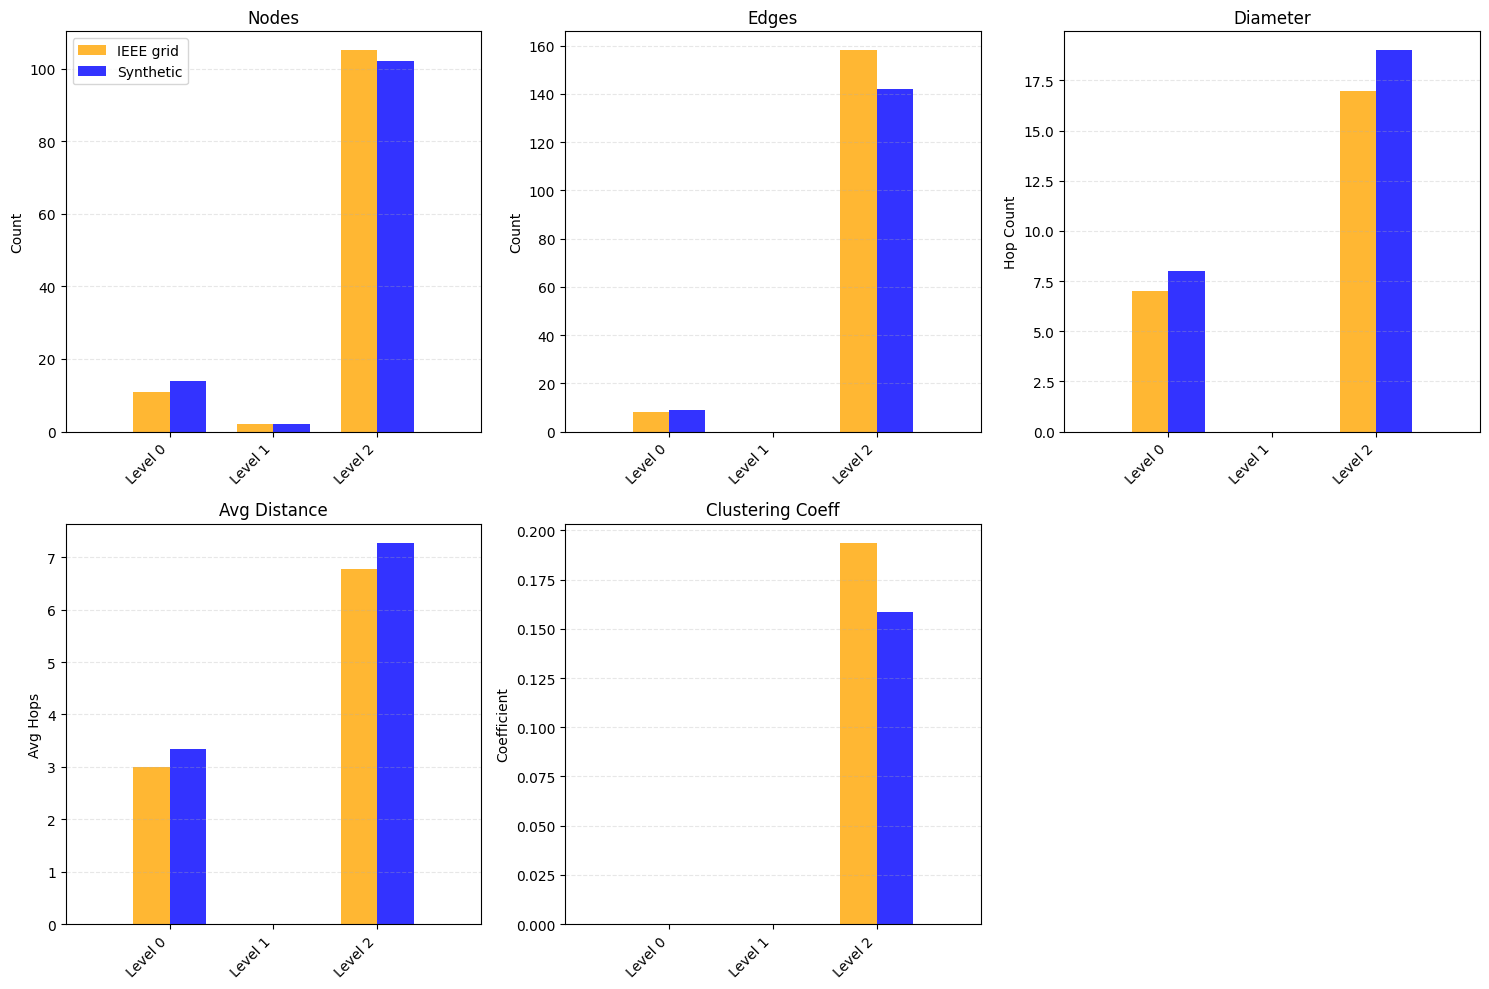

In [35]:
comparator.plot_level_topology_comparison()

## Visualizations

In [36]:
viz = GridVisualizer()

Calculating layout 'kamada_kawai'...


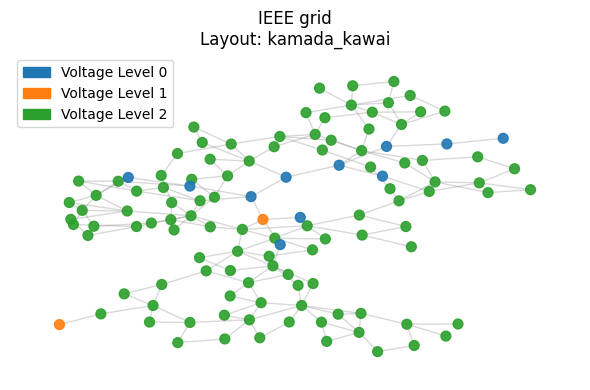

In [37]:
viz.plot_grid(
    graph_real, 
    layout='kamada_kawai',
    title="IEEE grid",
    figsize=(6, 4)
)

Calculating layout 'kamada_kawai'...


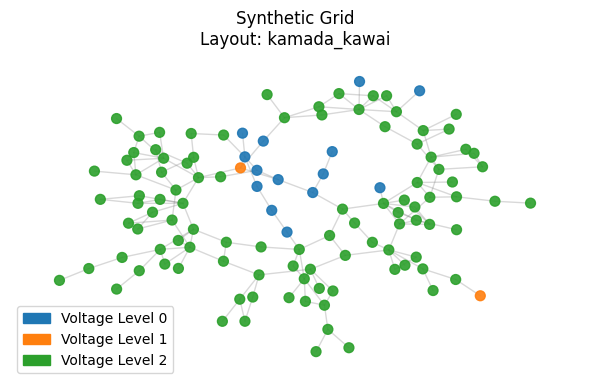

In [38]:
viz.plot_grid(
    synthetic_graph, 
    layout='kamada_kawai',
    title="Synthetic Grid",
    figsize=(6, 4)
)